# Softmax Regression Regression Example 

Imports:

In [38]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

sys.path.append(str(Path().resolve().parent))

from models.LogisticRegression import SoftMaxRegression
from GLMTrainer import GLMTrainer
from optimizers.SGDOptimizer import SGDOptimizer
from loss.CrossEntropyLoss import CategoricalCrossEntropyLoss

Generate some data: (You may want to use custom data here)

In [50]:
x = np.random.rand(30, 2) # generate random features with 2 examples
xRand = x + 0.1 * (np.random.rand(30, 2) - 0.5)
y = [0 if (point[0] >= point[1]) and (point[1] <= -point[0] + 1) else 1 if (point[1] > point[0]) and (point[0] <= 0.5) else 2 for point in xRand]
x, y

(array([[0.22820495, 0.41366894],
        [0.91175812, 0.94309903],
        [0.53407057, 0.77687694],
        [0.36657618, 0.90480166],
        [0.91102475, 0.75678211],
        [0.43307603, 0.19753965],
        [0.02719551, 0.46047863],
        [0.0869361 , 0.05822528],
        [0.38485383, 0.52783624],
        [0.4928395 , 0.6093467 ],
        [0.73751648, 0.69611066],
        [0.53828901, 0.50232503],
        [0.9451881 , 0.46203164],
        [0.23926885, 0.23731983],
        [0.15776101, 0.3043106 ],
        [0.17339469, 0.19456521],
        [0.55996269, 0.59684037],
        [0.497754  , 0.25789922],
        [0.2180464 , 0.86017753],
        [0.41949205, 0.36502126],
        [0.24495282, 0.89128568],
        [0.69182413, 0.1813905 ],
        [0.37804831, 0.42869467],
        [0.38276601, 0.55540474],
        [0.96028348, 0.03656498],
        [0.35615692, 0.4962413 ],
        [0.40340158, 0.62774164],
        [0.46222823, 0.52348852],
        [0.78119962, 0.92305944],
        [0.368

Plot our data to see it:

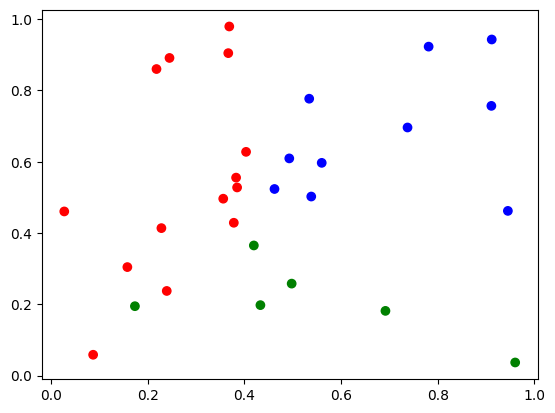

In [51]:
fig, ax = plt.subplots()
colors = np.array(['red' if point == 1 else 'blue' if point == 2 else 'green' for point in y])
ax.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()

Let's initialize our model, loss and optimizer

In [57]:
model = SoftMaxRegression(2, 3, [0, 1, 2])
optimizer = SGDOptimizer(0.1)
loss = CategoricalCrossEntropyLoss()

trainer = Trainer(model, loss, optimizer)

Let's train our model:

In [58]:
trainer.train(x, y, 500)

Epoch: 1
Loss: 33.02825303065863
Epoch: 2
Loss: 29.671562826694267
Epoch: 3
Loss: 28.249523168955477
Epoch: 4
Loss: 27.086438360862005
Epoch: 5
Loss: 26.045050016698774
Epoch: 6
Loss: 25.111574405575205
Epoch: 7
Loss: 24.270667240509965
Epoch: 8
Loss: 23.510802230617323
Epoch: 9
Loss: 22.820979002229286
Epoch: 10
Loss: 22.192313207521828
Epoch: 11
Loss: 21.616829635710356
Epoch: 12
Loss: 21.08796124371298
Epoch: 13
Loss: 20.600022306692566
Epoch: 14
Loss: 20.148281892368665
Epoch: 15
Loss: 19.728679700856038
Epoch: 16
Loss: 19.337774629088504
Epoch: 17
Loss: 18.972591389289732
Epoch: 18
Loss: 18.63056057130909
Epoch: 19
Loss: 18.309438675732324
Epoch: 20
Loss: 18.007262880284358
Epoch: 21
Loss: 17.722305834749818
Epoch: 22
Loss: 17.453043182511603
Epoch: 23
Loss: 17.198124544797096
Epoch: 24
Loss: 16.956350129956064
Epoch: 25
Loss: 16.726650588459677
Epoch: 26
Loss: 16.508070088057032
Epoch: 27
Loss: 16.29975183947772
Epoch: 28
Loss: 16.100925754382175
Epoch: 29
Loss: 15.91089785975016

Let's plot the decision boundary

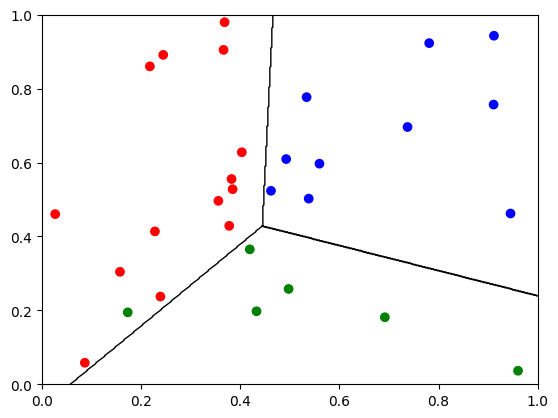

In [59]:
x1, x2 = np.meshgrid(np.linspace(0, 1, 500), 
                     np.linspace(0, 1, 500))
grid_points = np.c_[x1.ravel(), x2.ravel()]
probs = model(grid_points)
predicted_classes = np.argmax(probs, axis=1).reshape(xx.shape)
plt.contour(x1, x2, predicted_classes, levels=np.arange(0, 4) - 0.5, colors='k', linewidths=1)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()

This plot is of the model's decision boundary. As you can see it very closely seperates the points into there respective classes. 